# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [ ]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traindata/winequality-train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/testdata/winequality-test.csv')



# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [ ]:
# print shape of the train and test sets

print("Shape of train set: ", train_df.shape)
print("Shape of test set: ", test_df.shape)



# show random samples from the training data
train_df.sample(5)

Shape of train set:  (5198, 13)
Shape of test set:  (1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
4548,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0,0,1
2153,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,1,0
5086,7.0,0.22,0.24,11.0,0.044,75.0,167.0,0.99508,2.98,0.56,10.5,0,0
3207,7.6,0.36,0.48,13.5,0.038,44.0,116.0,0.99820,3.04,0.48,9.2,0,0
1075,8.5,0.16,0.33,1.0,0.076,17.0,57.0,0.99210,3.14,0.46,10.6,0,0


In [ ]:
# print information about the datasets (Is there any missing value? or Categorical feature?)
train_df.info()
print("\n")
print("Any missing values: ", train_df.isnull().values.any())

train_df.select_dtypes(include=['category']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 487.4 KB


Any missing values:  False


Index([], dtype='object')

# 4) Define train and test labels

In [ ]:
# make sure you remove the labels from datasets

train_labels = train_df.pop('quality')
print(train_labels)
test_labels = test_df.pop('quality')

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [ ]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df, train_labels, test_size=0.3, random_state=4000)

2- FineTune minimum sample split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
min_samples_splits = range(2, 50)
train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  clf = DecisionTreeClassifier(criterion='entropy', random_state=2021,min_samples_split = min_samples_split)
  clf.fit(x_train,y_train)
  
  # Evaluate on Training set
  train_acc = clf.score(x_train, y_train)
  print("Accuracy on training set", train_acc)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = clf.score(x_val,y_val)
  print("Accuracy on validation set", val_acc)
  val_results.append(val_acc)

Accuracy on training set 1.0
Accuracy on validation set 0.8378205128205128
Accuracy on training set 0.9972512369433755
Accuracy on validation set 0.8358974358974359
Accuracy on training set 0.9928532160527762
Accuracy on validation set 0.8378205128205128
Accuracy on training set 0.9870808136338648
Accuracy on validation set 0.842948717948718
Accuracy on training set 0.9802089059923035
Accuracy on validation set 0.8365384615384616
Accuracy on training set 0.9730621220450797
Accuracy on validation set 0.8288461538461539
Accuracy on training set 0.9716877405167674
Accuracy on validation set 0.8301282051282052
Accuracy on training set 0.9648158328752061
Accuracy on validation set 0.8192307692307692
Accuracy on training set 0.9557449147883452
Accuracy on validation set 0.816025641025641
Accuracy on training set 0.9540956569543705
Accuracy on validation set 0.8224358974358974
Accuracy on training set 0.9455744914788345
Accuracy on validation set 0.8217948717948718
Accuracy on training set 0.

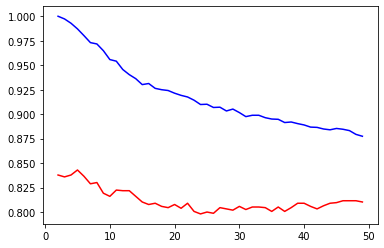

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [ ]:
# Choose the best minimum split sample based on the plot
Best_minSampl = val_results[np.argmax(val_acc)]
print(Best_minSampl)
# Train decision tree using the full training data and the best minimum split sample
# One line of code
# One line of code
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=20, random_state=2021, min_samples_split=Best_minSampl)
clf.fit(x_train, y_train)

# Estimate the prediction of the test data
test_pred = clf.predict(test_df)

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_labels,test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))


0.8378205128205128
Testing Accuracy = 80.7544%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

Score on training set 1.0
Score on validation set 0.8064102564102564
Score on training set 0.8914238592633315
Score on validation set 0.7916666666666666
Score on training set 0.8611874656404618
Score on validation set 0.7980769230769231
Score on training set 0.842495876855415
Score on validation set 0.791025641025641
Score on training set 0.8342495876855415
Score on validation set 0.7916666666666666
Score on training set 0.8287520615722924
Score on validation set 0.7948717948717948
Score on training set 0.8273776800439802
Score on validation set 0.8057692307692308
Score on training set 0.8213304013194063
Score on validation set 0.8006410256410257
Score on training set 0.8158328752061572
Score on validation set 0.8051282051282052
Score on training set 0.8161077515118197
Score on validation set 0.8051282051282052
Score on training set 0.811434854315558
Score on validation set 0.8032051282051282
Score on training set 0.8122594832325454
Score on validation set 0.8038461538461539
Score on t

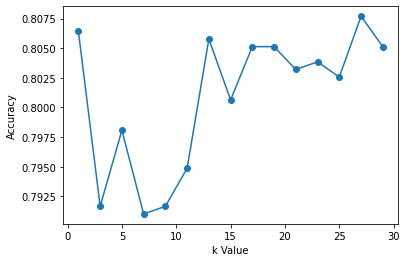



Best Validation Accuracy = 80.7692%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kVals = list(range(1,30,2))
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  score = model.score(x_val,y_val)
  accuracies.append(score)
  train_score = model.score(x_train,y_train)
  print("Score on training set", train_score)
  print("Score on validation set", score)

#plot results
plt.scatter(kVals, accuracies)
plt.plot(kVals, accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

# Pick the k value with the highest validation accuracy
i = np.argmax(accuracies)
print("\n")
print("Best Validation Accuracy = %.4f%%" % (accuracies[i]*100))

In [ ]:
# Train k-NN using the full training data with the best K that you found
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(x_train, y_train)

# Testing
predictions = model.predict(test_df)
TestAcc = accuracy_score(test_labels,predictions)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))


Testing Accuracy = 80.9084%


# REPORT

Problem: We are aiming to train our machine to predict wine quality by considering some features of wines. There are 5198 rows in train dataset and 1299 rows in test data set. So, test set is approximately %25 of the entire data.

We first loaded both train and test datasets to the colab file. We checked train set for any missing values and categorical features. Then we removed the label "quality" from both datasets.

We split train dataset into two parts: train and validation. Validation set consists of %30 of trainset. When splitting data, we mentioned random_state as parameter in order to get the same data split in different executions.

Decision Tree Classifier Results: We got the best accuracy on validation data when min_sample_split variable is 2. Max accuracy rate is 83.7820%. When we build the tree and evalute it on test set, accuracy on test set is
80.7544%.

k-NN Classifier Results: We got the best accuracy on validation data when k = 27. Best Validation Accuracy = 80.7692% for this k value. We build the model for this k value and evalute it on test set, accuracy on the test set is 80.9084%.

Accurracy on test data is very close to each other for these two methods but Decision Tree algorithm is faster than k-NN.